# Credit_card_fraud_detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Yash/OneDrive/Documents/GitHub/CreditCardFraudDataset/creditcard.csv')

In [3]:
len(df)

284807

In [4]:
df.head(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,128.0,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
196,130.0,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0
197,130.0,1.353283,-0.694900,0.970826,-0.426559,-1.417263,-0.505710,-0.932069,-0.083957,-0.224208,...,0.284341,0.993434,-0.164893,0.474257,0.623848,-0.006750,0.046026,0.022043,15.93,0
198,131.0,-1.007391,1.261943,1.207203,1.307575,0.153211,0.062291,0.508647,0.079447,-0.395211,...,0.039150,0.411661,-0.080320,0.121235,-0.133000,-0.303177,-0.463913,-0.164157,10.00,0


In [5]:
df.iloc[:5,0:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739


In [6]:
df[df['Class']==0].shape

(284315, 31)

In [7]:
df.isnull().values.any()

False

In [8]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
sizes = df[df['Class']==0].shape[0],df[df['Class']==1].shape[0]
sizes

(284315, 492)

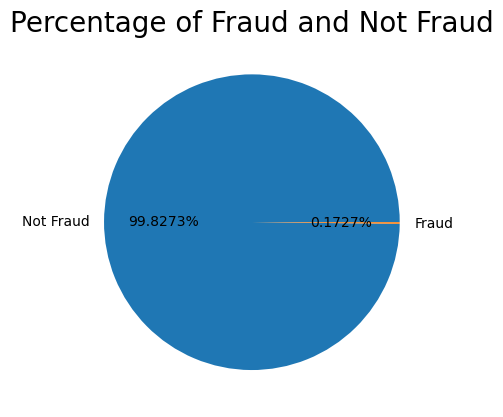

In [10]:
title = 'Percentage of Fraud and Not Fraud'
plt.title(title, size = 20, pad = 0)
label = 'Not Fraud', 'Fraud'
plt.pie(sizes, labels=label, autopct='%1.4f%%')
plt.show()

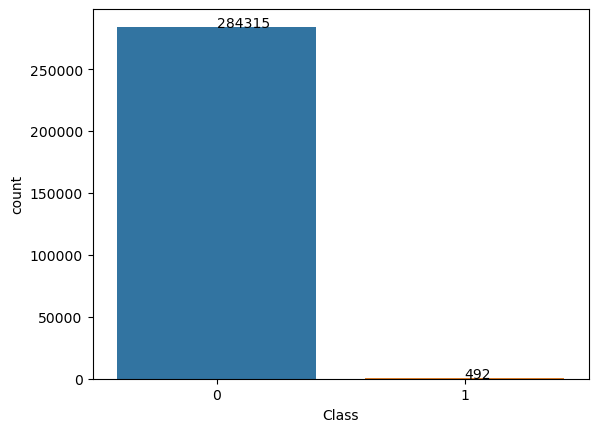

In [11]:
ax = sns.countplot(x=df['Class'], data=df)
counts = df['Class'].value_counts()
for i, count in enumerate(sizes):
     ax.text(i, count, str(count))

In [12]:
column_list = list(df.columns)
column_list

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

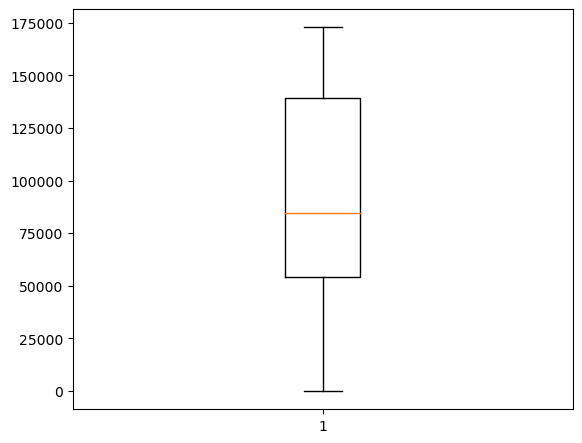

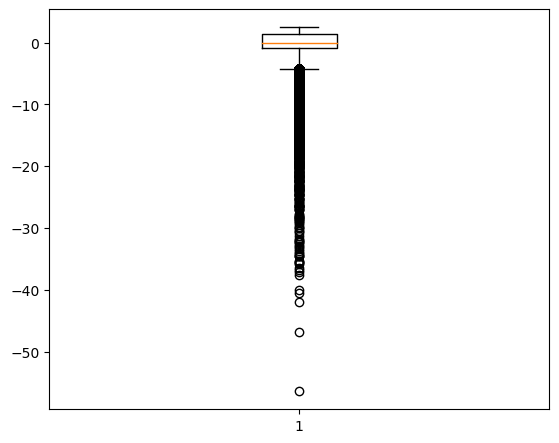

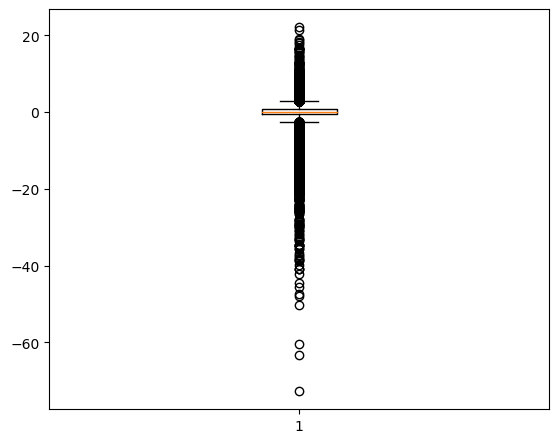

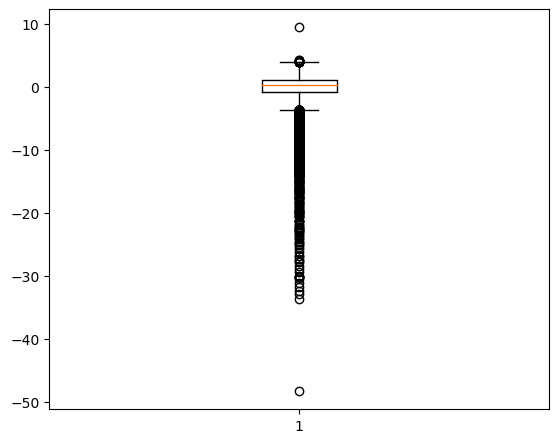

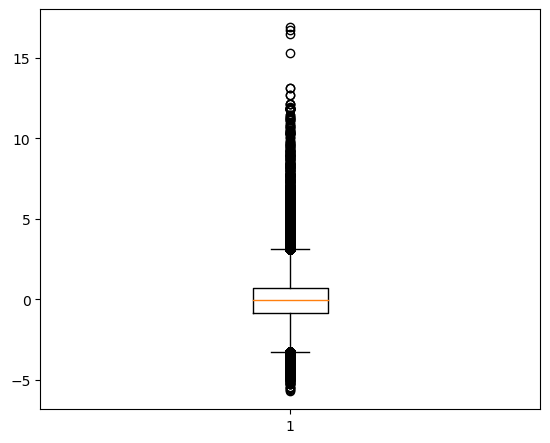

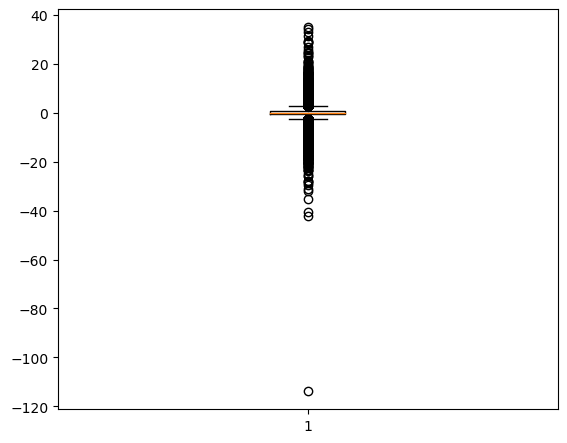

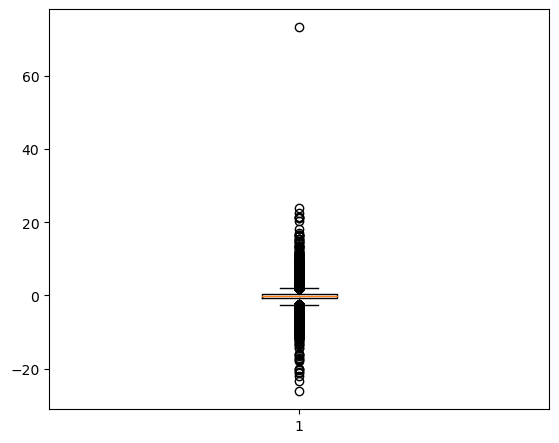

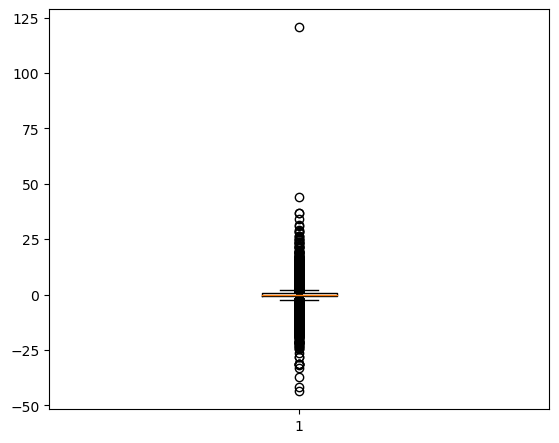

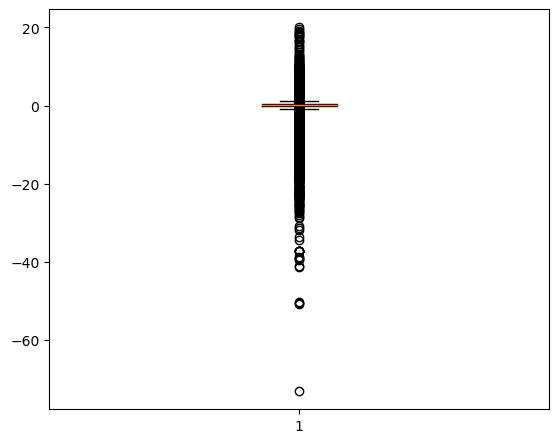

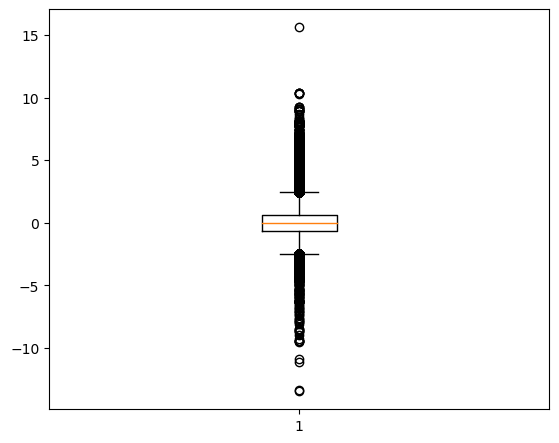

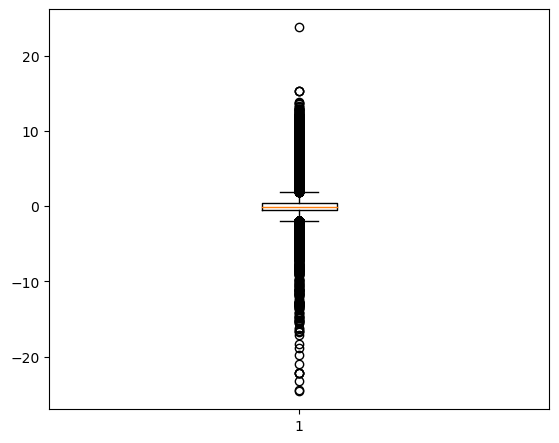

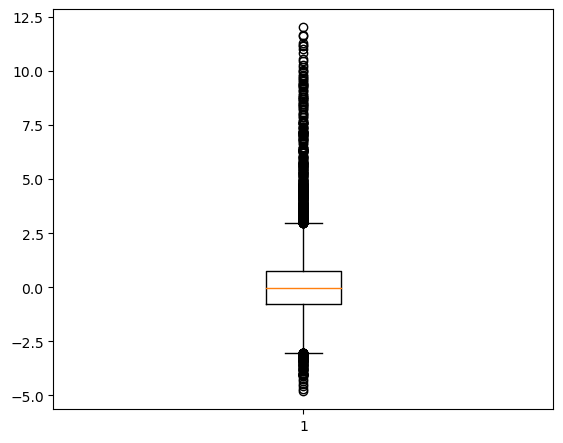

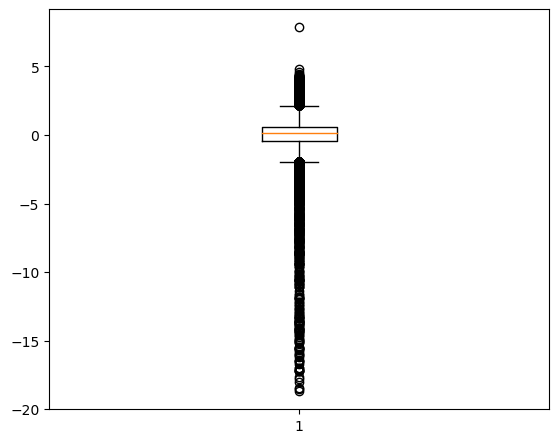

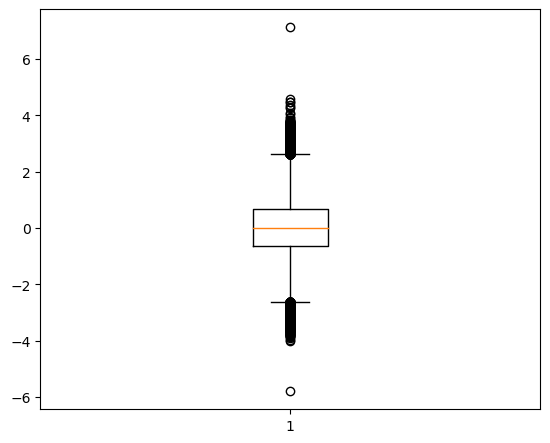

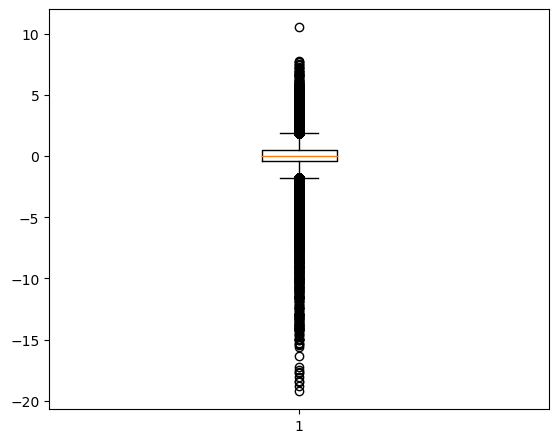

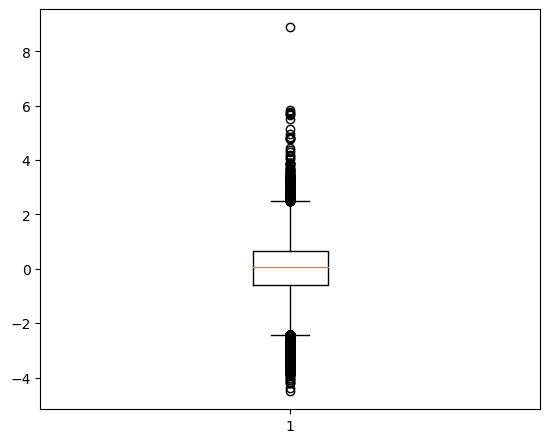

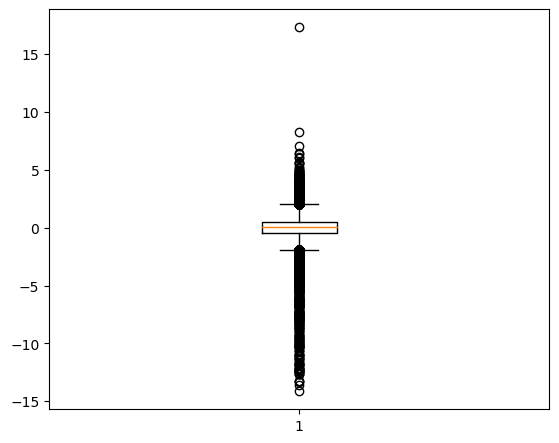

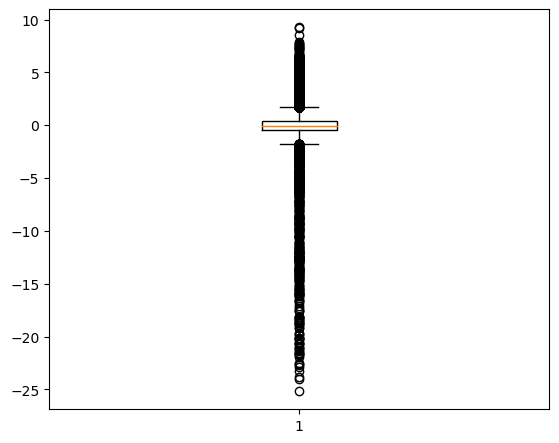

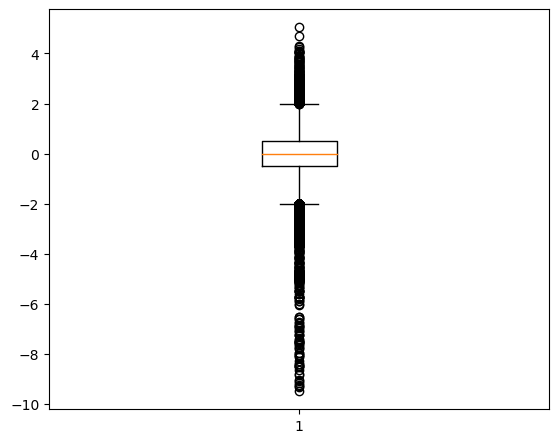

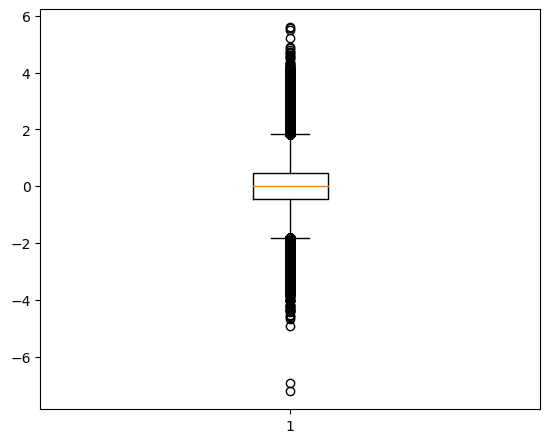

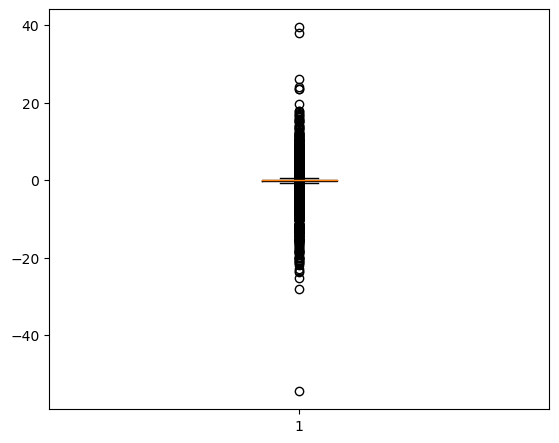

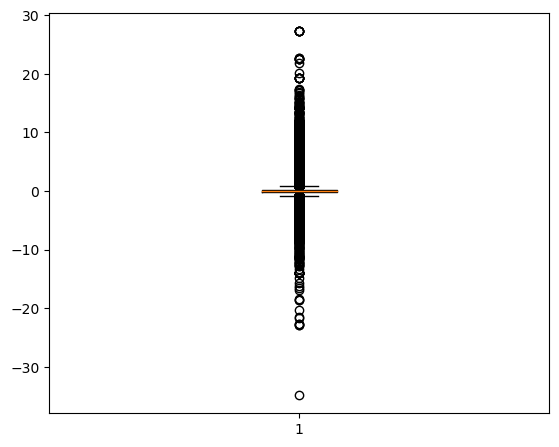

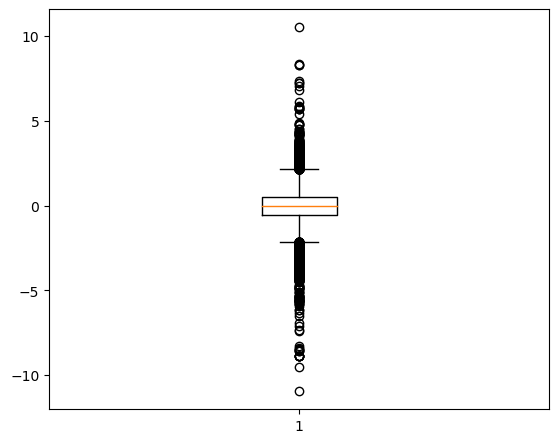

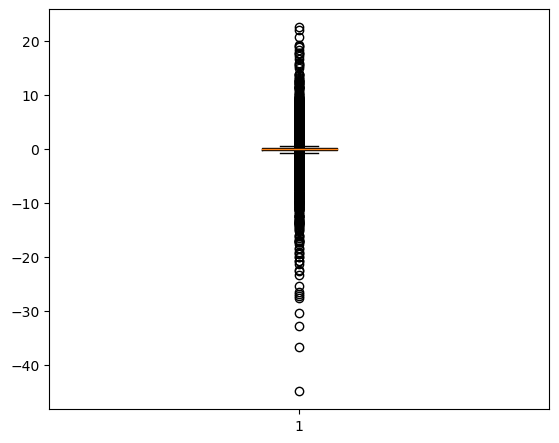

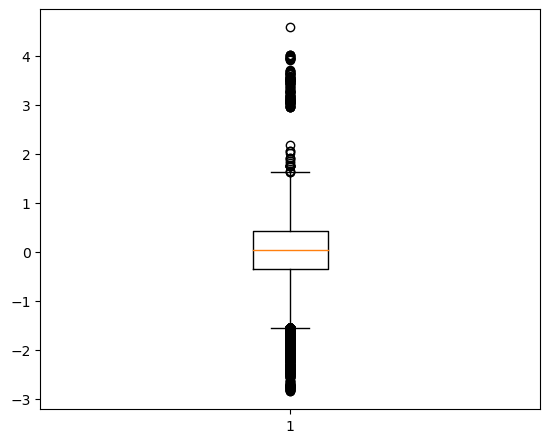

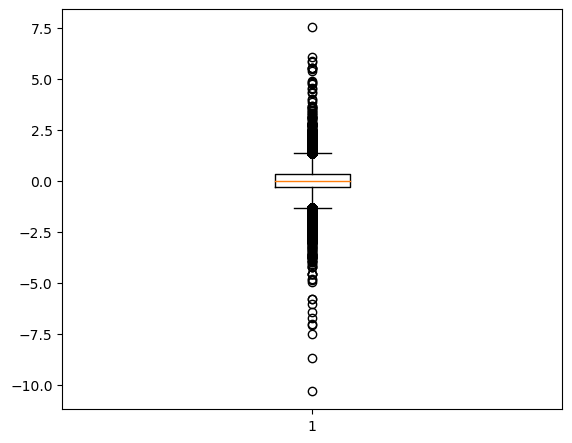

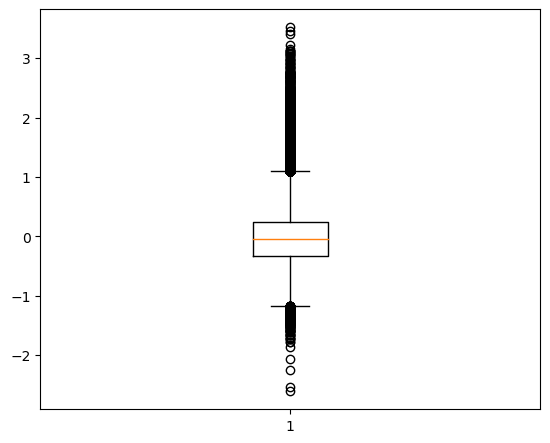

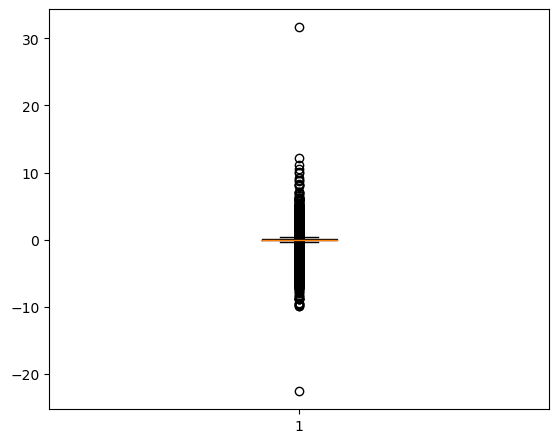

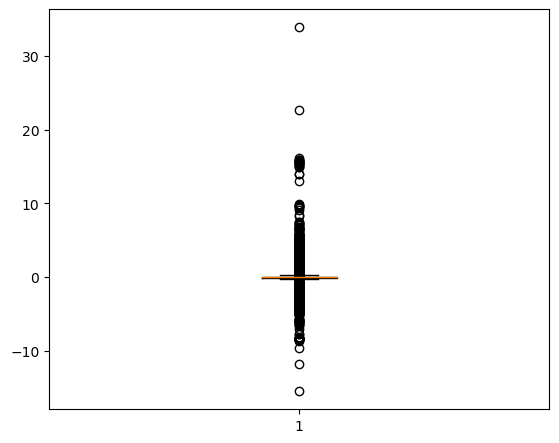

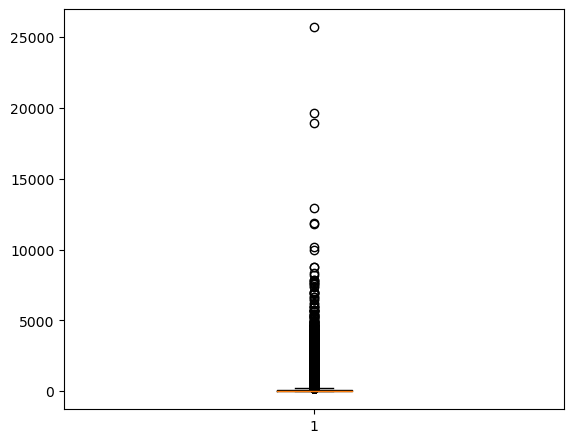

In [13]:
# for i in range(0, len(column_list)-1):

 
# Creating plot
for ele in range(0,len(column_list)-1):
    fig = plt.figure(figsize =(5, 4))
 
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(df[column_list[ele]])   
    plt.show()           

In [15]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [14]:
X_unscale = df.iloc[:,0:30]
Y = df.iloc[:,30:31]
Y
X_unscale

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [15]:
#Normalising dataset
scaler = StandardScaler()
# transform data
df_scaled = scaler.fit_transform(X_unscale)
X = pd.DataFrame(df_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


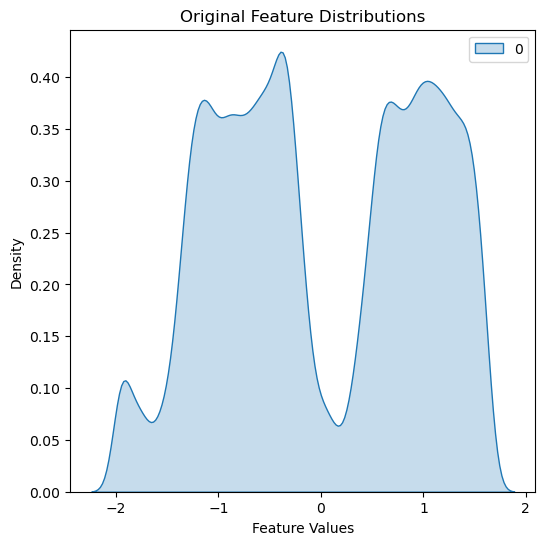

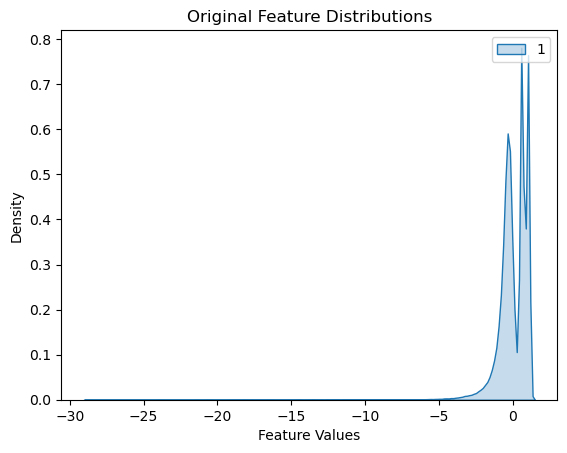

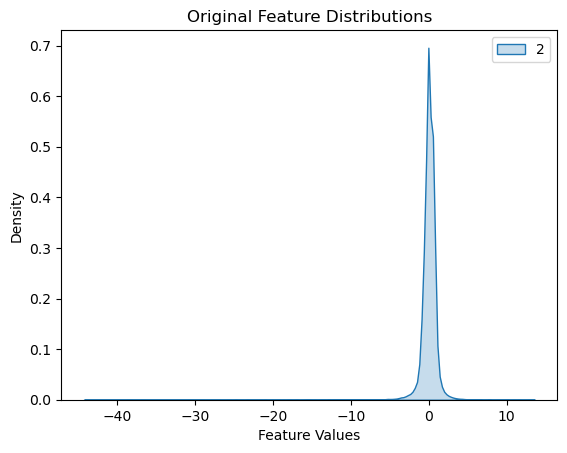

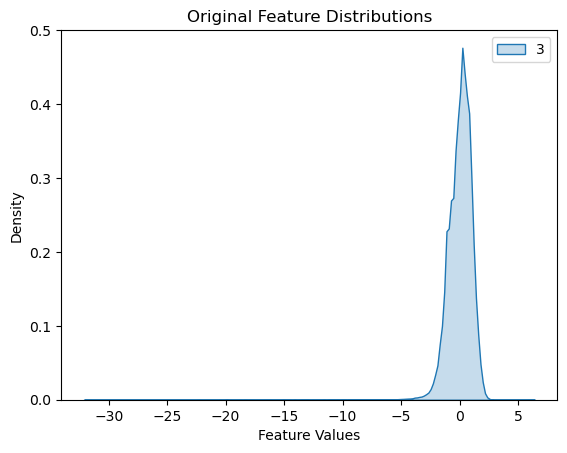

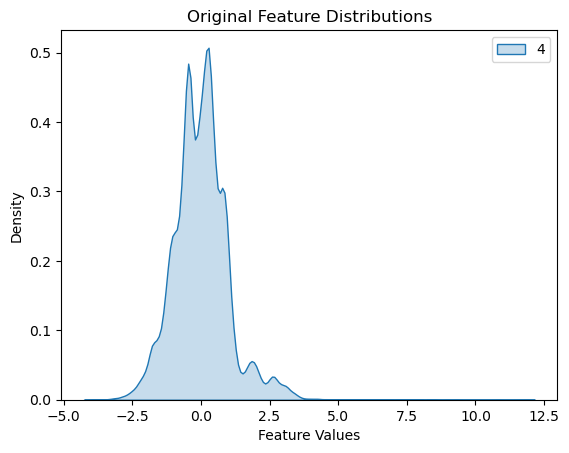

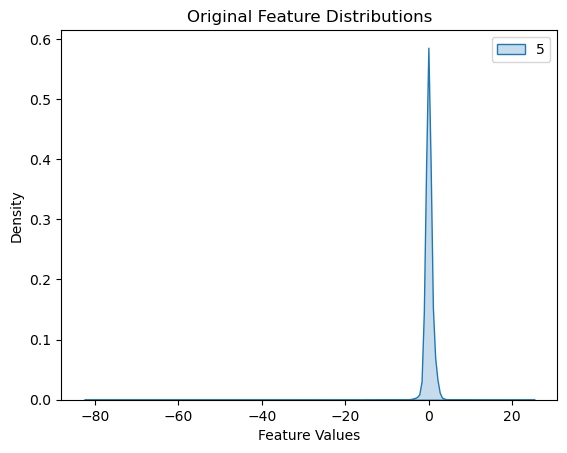

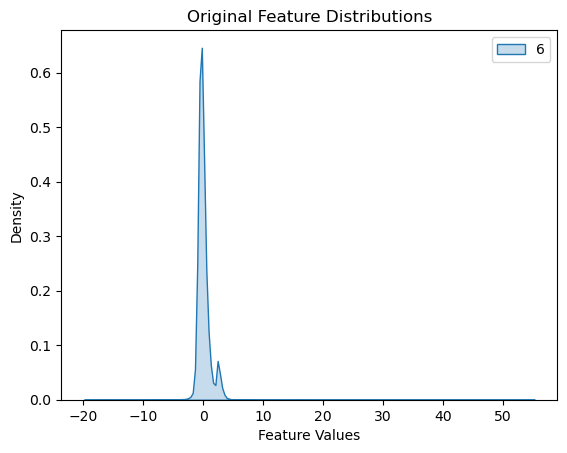

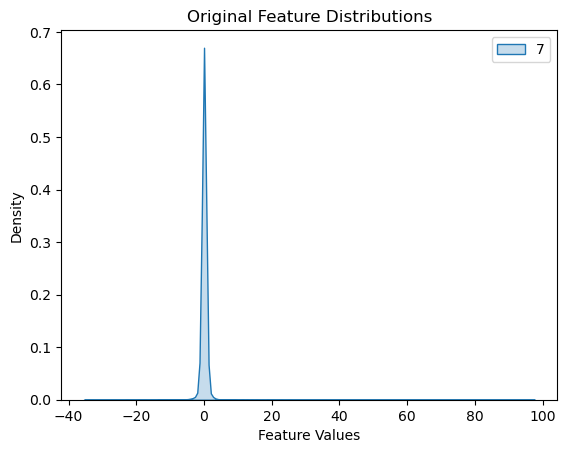

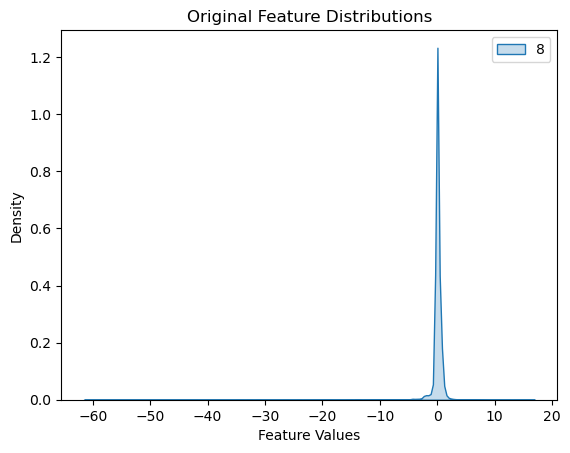

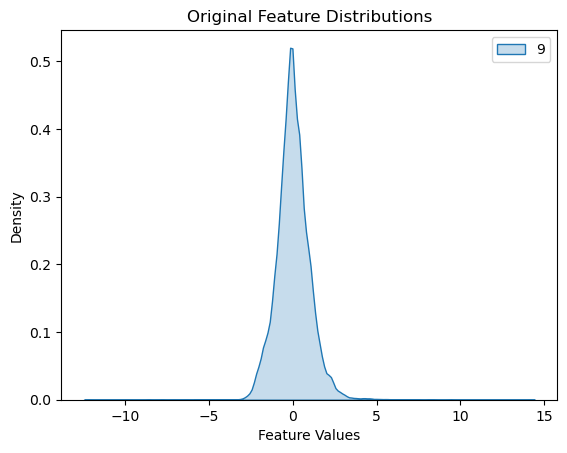

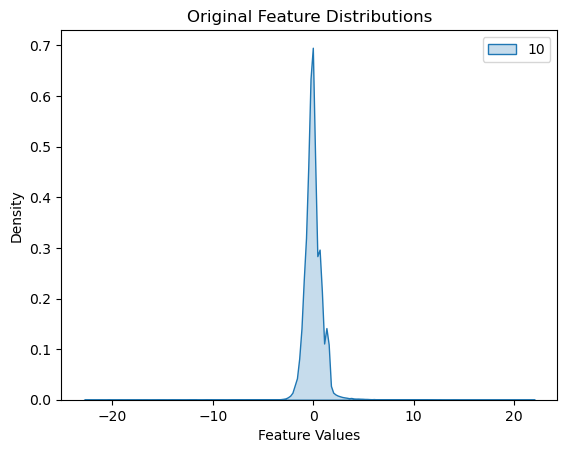

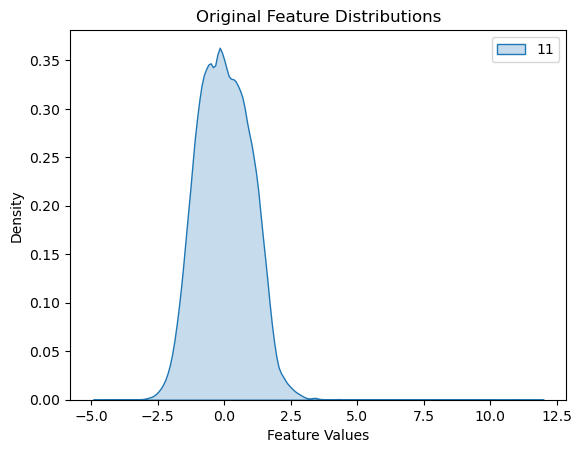

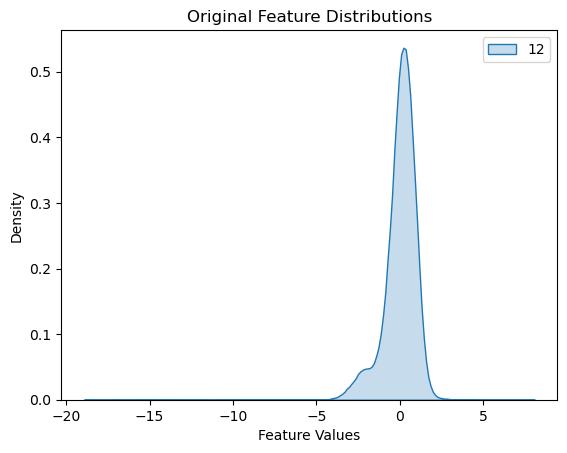

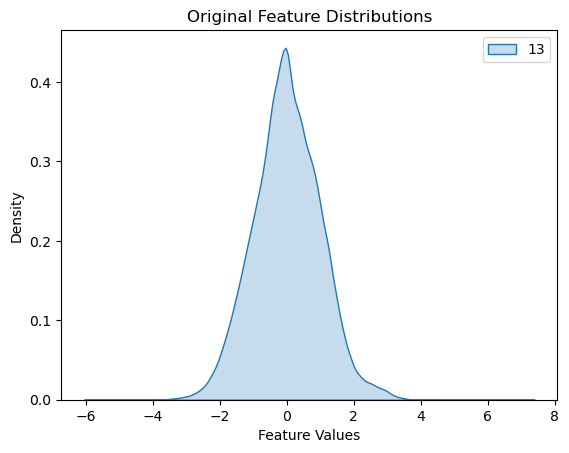

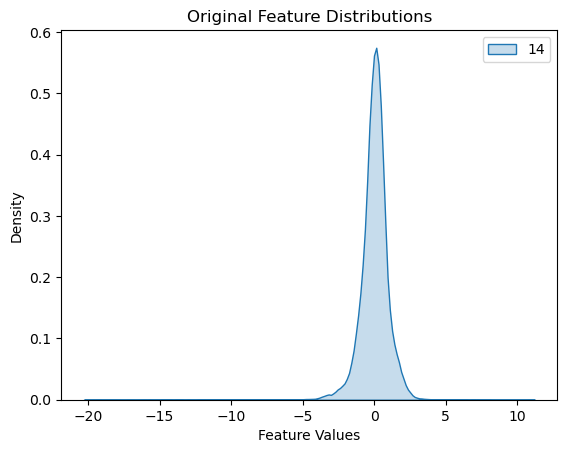

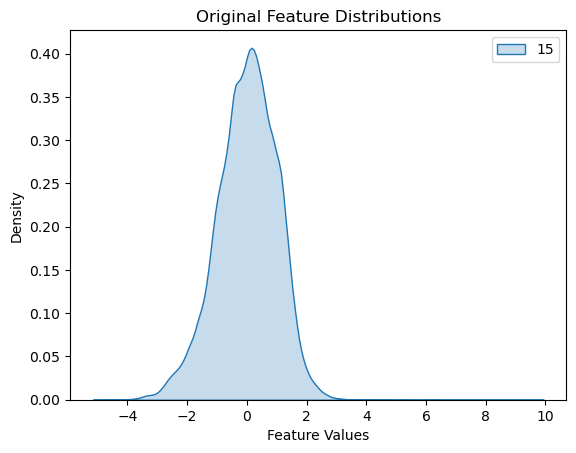

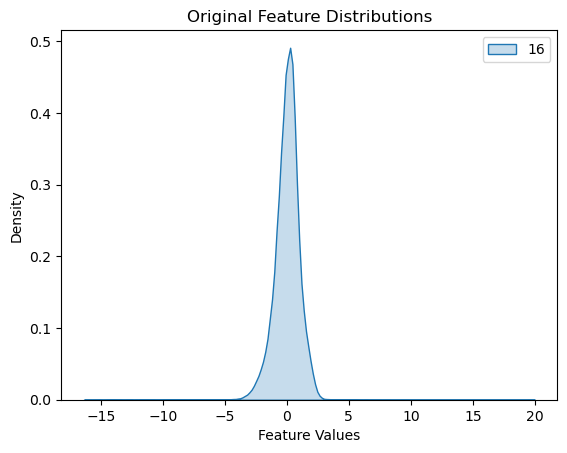

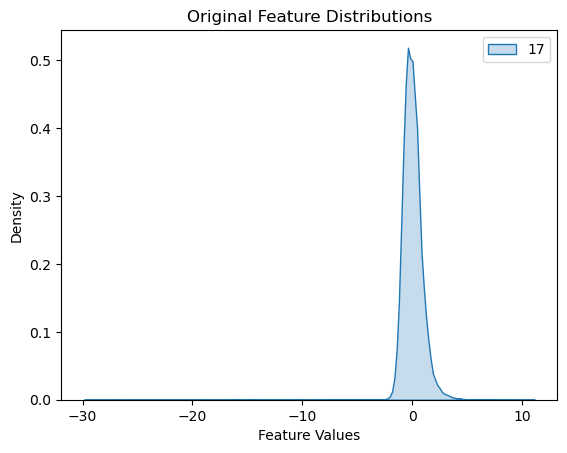

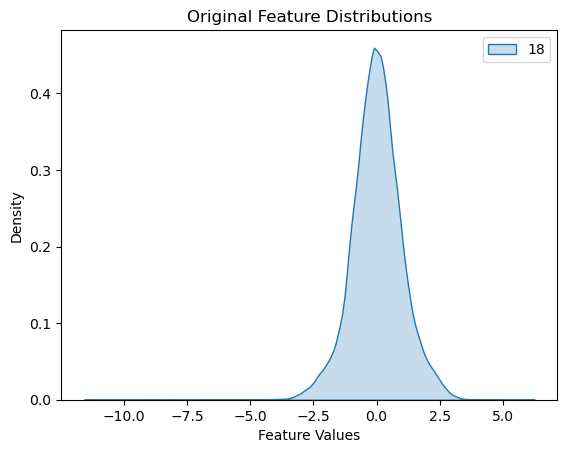

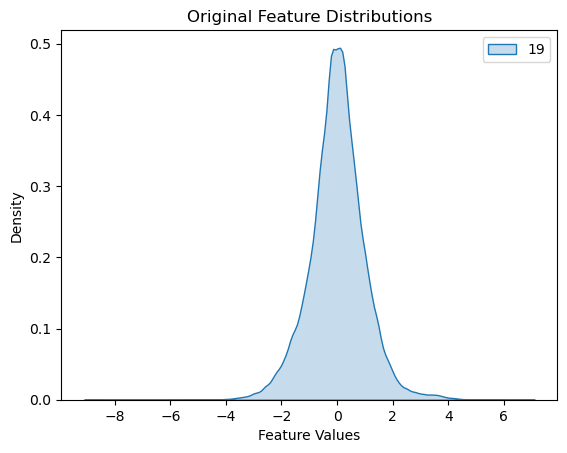

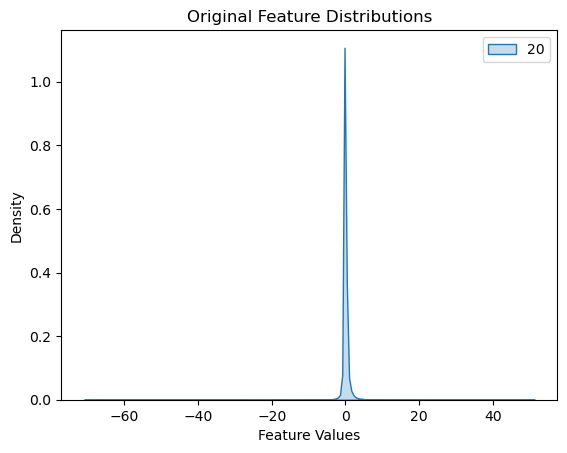

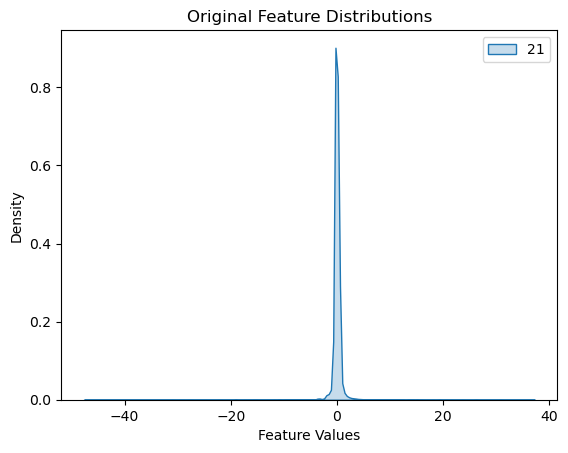

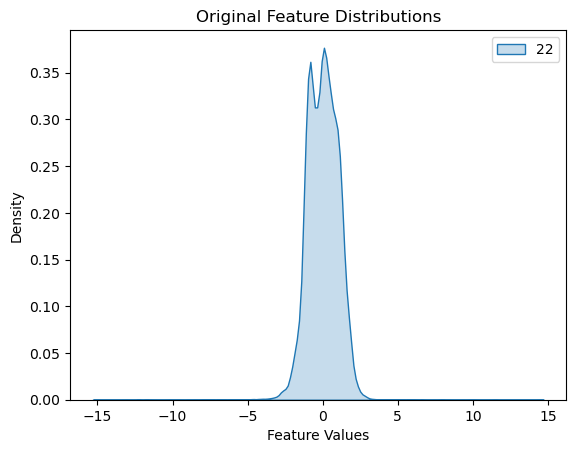

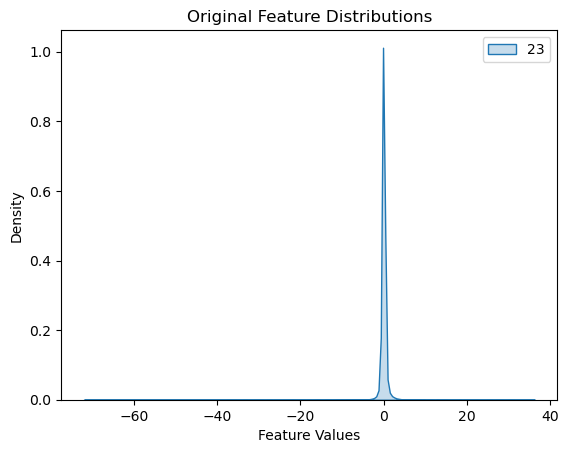

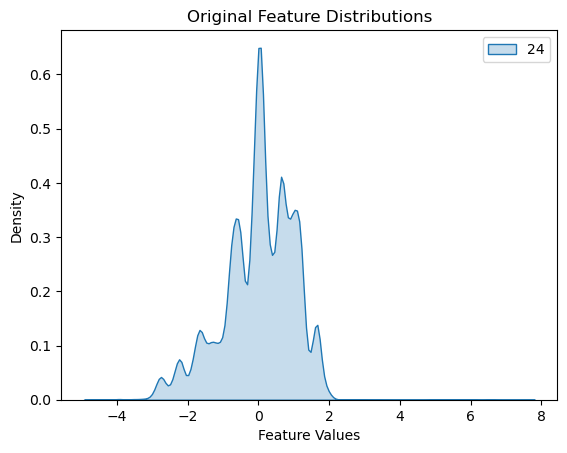

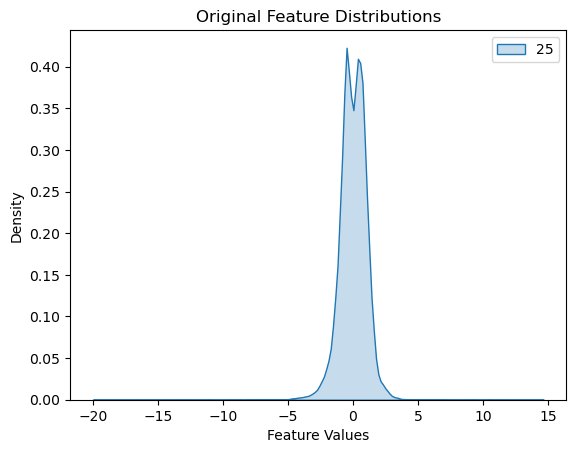

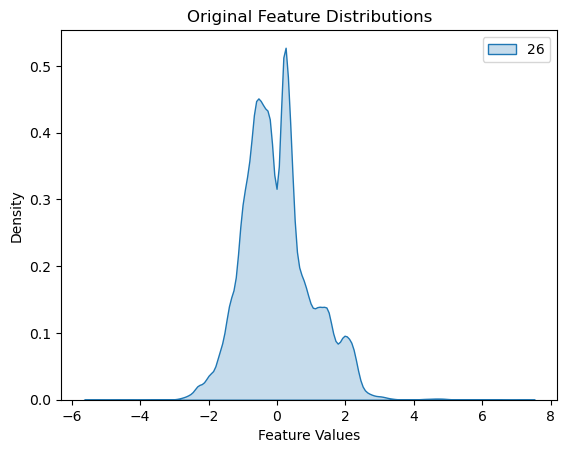

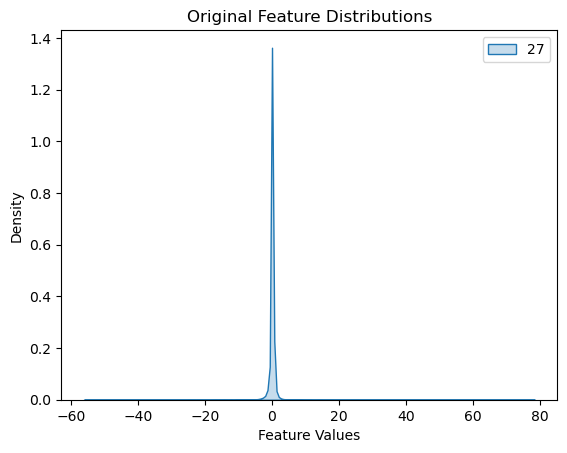

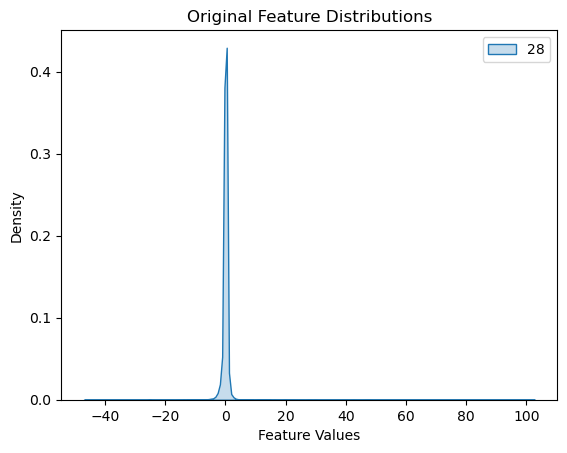

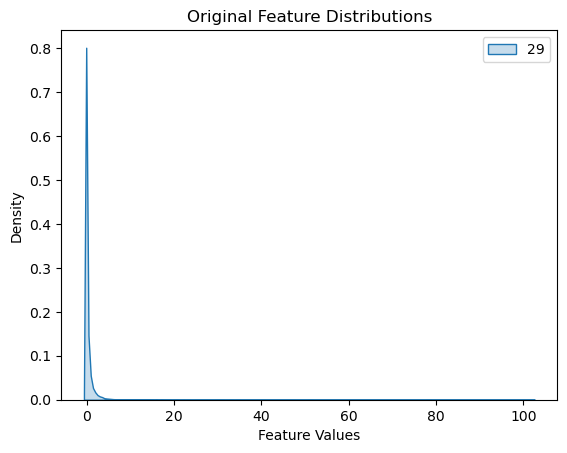

In [16]:
num_columns = X.columns
plt.figure(figsize=(6, 6))
for column in num_columns:
    sns.kdeplot(X[column], label=column, shade=True)
    plt.title('Original Feature Distributions')
    plt.xlabel('Feature Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [17]:
#Splitting Dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)
y_test

,Class
225184,0
116637,0
99414,0
217619,0
279878,0
...,...
47150,0
64513,0
57548,0
282961,0


In [18]:
type(y_test)

pandas.core.frame.DataFrame

In [19]:
len(y_test)

56962

In [20]:
y_test[y_test['Class']==0].shape

(56878, 1)

In [28]:
#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression()

num_folds = 5  # Number of folds in cross-validation
scoring_metric = 'accuracy'  # Choose a relevant scoring metric

# Perform cross-validation and get scores
cross_val_scores = cross_val_score(model, X, Y, cv=num_folds, scoring=scoring_metric)

# Display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.99903444 0.99933289 0.99894665 0.99933288 0.99905198]
Mean Score: 0.999139768026079
Standard Deviation: 0.00016166719524833242


In [30]:
#Learning curve function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    x_train,x_val,y_train, y_val = train_test_split(X,Y, test_size = 0.2)
    train_error, val_error = [], []
    for m in range(1, 10000):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val[:m])
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_test[:m], y_val_predict))
    plt.plot(np.sqrt(train_error), "r-+", linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_error), "r-+", linewidth = 2, label = 'test')
plot_learning_curves(RandomForestClassifier(random_state = 0) , X, Y)

KeyboardInterrupt: 

In [21]:
#Logistic Regression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [22]:
#train_lr
y_pred_lr_train = classifier_lr.predict(x_train)
acc_lr_train = accuracy_score(y_train,y_pred_lr_train)
f1_lr_train = f1_score(y_train, y_pred_lr_train)
recall_lr_train = recall_score(y_train,y_pred_lr_train)
prec_lr_train = precision_score(y_train, y_pred_lr_train)
results_lr_train = pd.DataFrame([['LogisticRegression', acc_lr_train, f1_lr_train, prec_lr_train, recall_lr_train]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results_lr_train

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999179,0.733238,0.877133,0.629902


In [23]:
#test_lr
y_pred = classifier_lr.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
results_lr_test = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results_lr_test

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999456,0.794702,0.895522,0.714286


In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56871     7]
 [   24    60]]


In [25]:
#Importing Smote_logistics
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smo, y_train_smo = smote.fit_resample(x_train,y_train)

In [26]:
model_lr_smo = LogisticRegression()
model_lr_smo.fit(x_train_smo,y_train_smo)

LogisticRegression()

In [27]:
#train_lr_smo
y_pred_lrsmo_train = model_lr_smo.predict(x_train)
acc_lr_smo_train = accuracy_score(y_train, y_pred_lrsmo_train)
f1_lr_smo_train = f1_score(y_train, y_pred_lrsmo_train)
recall_lr_smo_train = recall_score(y_train, y_pred_lrsmo_train)
prec_lr_smo_train = precision_score(y_train, y_pred_lrsmo_train)
result_bal_train = pd.DataFrame([['LogisticRegression_smote', acc_lr_smo_train, f1_lr_smo_train, prec_lr_smo_train, recall_lr_smo_train]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_bal_train

,Model,accuracy,f1,precision,recall
0,LogisticRegression_smote,0.975009,0.117483,0.062707,0.928922


In [28]:
#test_lr_smo
y_pred_smo = model_lr_smo.predict(x_test)
acc_smo= accuracy_score(y_test, y_pred_smo)
f1_smo = f1_score(y_test,y_pred_smo)
recall_smo = recall_score(y_test,y_pred_smo)
prec_smo = precision_score(y_test, y_pred_smo)
result_bal = pd.DataFrame([['LogisticRegression_smote', acc_smo, f1_smo, prec_smo,recall_smo]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_bal

,Model,accuracy,f1,precision,recall
0,LogisticRegression_smote,0.974931,0.096203,0.050802,0.904762


In [ ]:
#Random Forest
classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train, y_train)

In [38]:
#train_rf
y_pred_train = classifier_rm.predict(x_train)
acc_train_rm= accuracy_score(y_train, y_pred_train)
f1_train_rm = f1_score(y_train,y_pred_train)
recall_train_rm = recall_score(y_train,y_pred_train)
prec_train_rm = precision_score(y_train, y_pred_train)
print('RandomForestRegression Training data accuracy')
result_bal = pd.DataFrame([['RandomForestRegression', acc_train_rm, f1_train_rm, prec_train_rm ,recall_train_rm]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_bal

RandomForestRegression Training data accuracy


,Model,accuracy,f1,precision,recall
0,RandomForestRegression,0.999996,0.998729,1.0,0.997462


In [39]:
#test_rf
y_pred_rm = classifier_rm.predict(x_test)
acc_rm= accuracy_score(y_test, y_pred_rm)
f1_rm = f1_score(y_test,y_pred_rm)
recall_rm = recall_score(y_test,y_pred_rm)
prec_rm = precision_score(y_test, y_pred_rm)
result_rf_test = pd.DataFrame([['RandomForestRegression', acc_rm, f1_rm, prec_rm,recall_rm]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_rf_test

,Model,accuracy,f1,precision,recall
0,RandomForestRegression,0.999579,0.865169,0.9625,0.785714


In [40]:
cm = confusion_matrix(y_test, y_pred_rm)
print(cm)

[[56861     3]
 [   21    77]]


In [41]:
#random Forest Smote
smote = SMOTE()
x_train_smo,y_train_smo = smote.fit_resample(x_train,y_train)
model = RandomForestClassifier(random_state = 0)
model.fit(x_train_smo,y_train_smo)

RandomForestClassifier(random_state=0)

In [42]:
#train_rf_smo
y_train_pred_smo = model.predict(x_train)
acc_rm_train_smo= accuracy_score(y_train, y_train_pred_smo)
f1_rm_train_smo= f1_score(y_train,y_train_pred_smo)
recall_rm_train_smo = recall_score(y_train,y_train_pred_smo)
prec_rm_train_smo = precision_score(y_train, y_train_pred_smo)
result_bal_t = pd.DataFrame([['RandomForestRegression_smote', acc_rm_train_smo, f1_rm_train_smo, prec_rm_train_smo, recall_rm_train_smo]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_bal_t

,Model,accuracy,f1,precision,recall
0,RandomForestRegression_smote,1.0,1.0,1.0,1.0


In [43]:
#test_rf_smo
y_pred_rm_smo = model.predict(x_test)

acc_rm_smo= accuracy_score(y_test, y_pred_rm_smo)
f1_rm_smo= f1_score(y_test,y_pred_rm_smo)
recall_rm_smo = recall_score(y_test,y_pred_rm_smo)
prec_rm_smo = precision_score(y_test, y_pred_rm_smo)

result_rf_test_smo = pd.DataFrame([['RandomForestRegression_smote', acc_rm_smo, f1_rm_smo, prec_rm_smo, recall_rm_smo]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_rf_test_smo

,Model,accuracy,f1,precision,recall
0,RandomForestRegression_smote,0.999561,0.86631,0.910112,0.826531


In [44]:
#XG_BOOST Algorithm
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
#Training set XG_boost
y_pred_xg_train = model_xgb.predict(x_train)
accuracy_xg = accuracy_score(y_train, y_pred_xg_train)
f1_xg = f1_score(y_train, y_pred_xg_train)
recall_xg = recall_score(y_train, y_pred_xg_train)
prec_xg = precision_score(y_train, y_pred_xg_train)

result_xg = pd.DataFrame([["XG_boost", accuracy_xg, f1_xg, prec_xg, recall_xg]], columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_xg

,Model,accuracy,f1,precision,recall
0,XG_boost,1.0,1.0,1.0,1.0


In [126]:
#Testing set XG_boost
y_pred_xg_test = model_xgb.predict(x_test)
accuracy_xg_test = accuracy_score(y_test, y_pred_xg_test)
f1_xg_test = f1_score(y_test, y_pred_xg_test)
recall_xg_test = recall_score(y_test, y_pred_xg_test)
prec_xg_test = precision_score(y_test, y_pred_xg_test)

result_xg_test = pd.DataFrame([["XG_boost", accuracy_xg_test, f1_xg_test, prec_xg_test, recall_xg_test]], columns = ["Model", "accuracy", "f1", "precision", "recall"])
result_xg_test
y_pred_xg_test

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
cm = confusion_matrix(y_test, y_pred_xg_test)
print(cm)

[[56863     1]
 [   21    77]]


In [48]:
result = pd.concat([results_lr_test, result_rf_test, result_xg_test], ignore_index = True)
result ## All models accuracy and perormance metrics

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999122,0.695122,0.863636,0.581633
1,RandomForestRegression,0.999579,0.865169,0.962500,0.785714
2,XG_boost,0.999614,0.875000,0.987179,0.785714


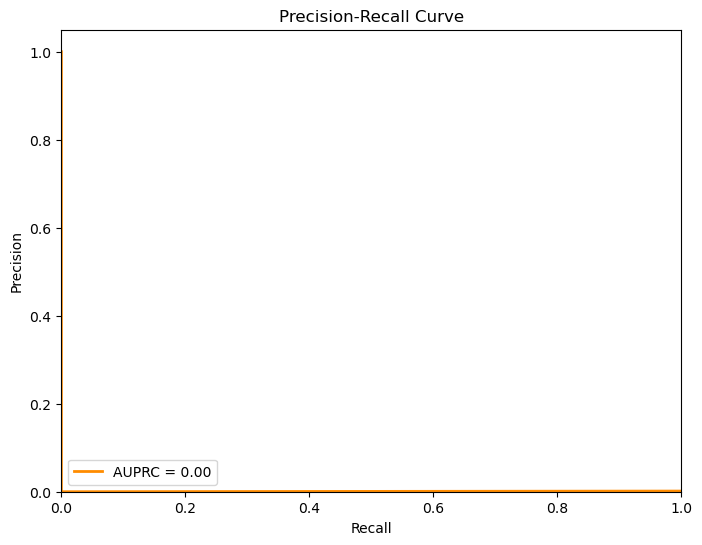

In [125]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
precision, recall,_ = precision_recall_curve(y_test,y_pred_xg_test)

# Calculate AUPRC
auprc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### XG_Boost have a great performance metrics on comparing with logistic regression and Random Forest 

In [ ]:
#Performing Predictions

In [102]:
def predictions(model, index):
    feature_names = X.columns.tolist()#[:-1]
    single_obs_df = pd.DataFrame([X.loc[index, feature_names]])
    prediction = model_xgb.predict(single_obs_df)
    return f"Class : {prediction[0]}" # 'Class : 1' means he is defaulter
predictions(model_xgb, 281674) # Change model and index to get prediciton.

'Class : 1'

In [58]:
df[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
